# Capstone Project

Peter Liu
March 1st, 2018

## Data Exploration and Exploratory Visualization

### Here is a graph of the adjusted closing prices of normalized market indices.

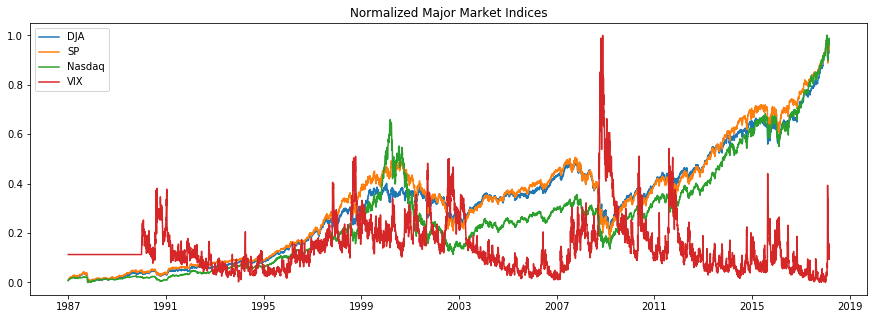

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing

from IPython.display import display

import dataset as ds

%matplotlib inline

# read csv files

df_dja = ds.read_csv('^DJI.csv', 'DJA')
df_sp = ds.read_csv('^GSPC.csv', 'SP')
df_nasdaq = ds.read_csv('^IXIC.csv', 'Nasdaq')
df_vix = ds.read_csv('^VIX.csv', 'VIX')

# create dataset
df_equity = pd.concat([df_dja, df_sp, df_nasdaq, df_vix], axis=1)
df_equity.fillna(method='bfill', inplace=True)
df_equity = df_equity.loc['1987-01-01' : '2018-03-01']

# normalize data

df_equity = ds.normalize(df_equity)

# plot graph
plt.figure(figsize=(15,5))
plt.title('Normalized Major Market Indices')

for ticker in df_equity.columns:
    plt.plot(df_equity.index.values, df_equity[ticker], label=ticker)

plt.legend(loc='upper left')
plt.show()






### Here is a graph of the economic indicators with interpolated daily prices.

C:\Users\pl9972\AppData\Local\conda\conda\envs\dog-project\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, _DataConversionWarning)


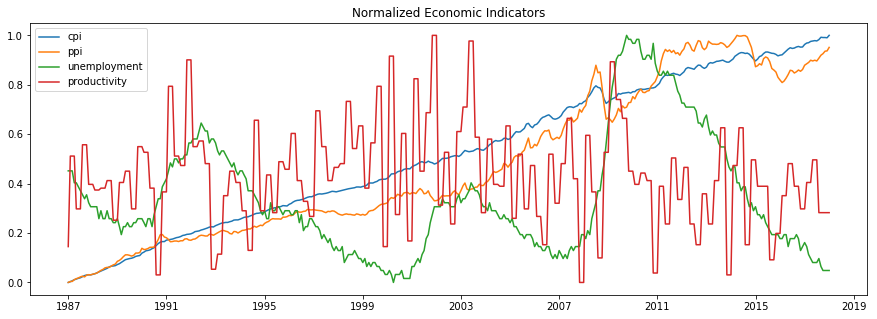

In [2]:
# read Excel files

xl = pd.ExcelFile('bls.xlsx')

df_cpi = ds.read_monthly(xl, 'cpi')
df_unemp = ds.read_monthly(xl, 'unemployment')
df_ppi = ds.read_monthly(xl, 'ppi')
df_productivity = ds.read_quarterly(xl, 'productivity')

# create dataset
df_econ = pd.concat([df_cpi, df_ppi, df_unemp, df_productivity], axis=1)

df_econ.fillna(method='bfill', inplace=True)
df_econ.fillna(method='ffill', inplace=True)
df_econ = df_econ.loc['1987-01-01' : '2018-01-01']

df_econ = ds.normalize(df_econ)

# plot graph

plt.figure(figsize=(15,5))
plt.title('Normalized Economic Indicators')

for ticker in (df_econ.columns):
    plt.plot(df_econ.index.values, df_econ[ticker], label=ticker)

plt.legend(loc='upper left')
plt.show()


### Here is a graph of the normalized US Treasury Yield Curve.

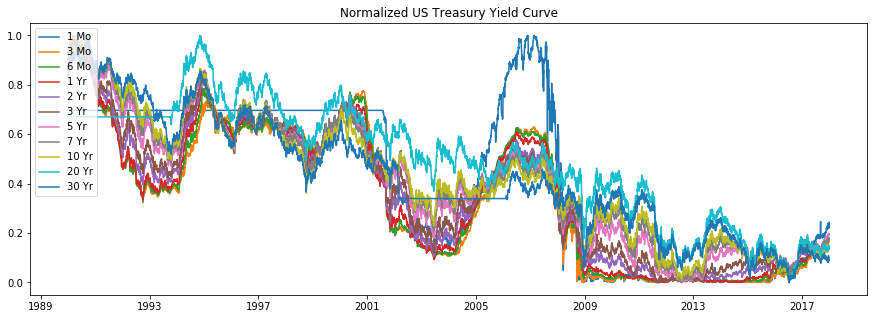

In [3]:
# read Excel files

xls = pd.ExcelFile('treasury.xlsx')
df_treas = xls.parse('yieldcurve')
df_treas = df_treas.set_index('Date')

df_treas.fillna(method='bfill', inplace=True)
df_treas.fillna(method='ffill', inplace=True)
df_treas = df_treas.loc['1987-01-01' : '2018-01-01']

# normalize data

df_treas = ds.normalize(df_treas)

# plot graph

plt.figure(figsize=(15,5))
plt.title('Normalized US Treasury Yield Curve')

for ticker in (df_treas.columns):
    plt.plot(df_treas.index.values, df_treas[ticker], label=ticker)

plt.legend(loc='upper left')
plt.show()



### Here is a graph of the correction indicator overlaying the market indices.

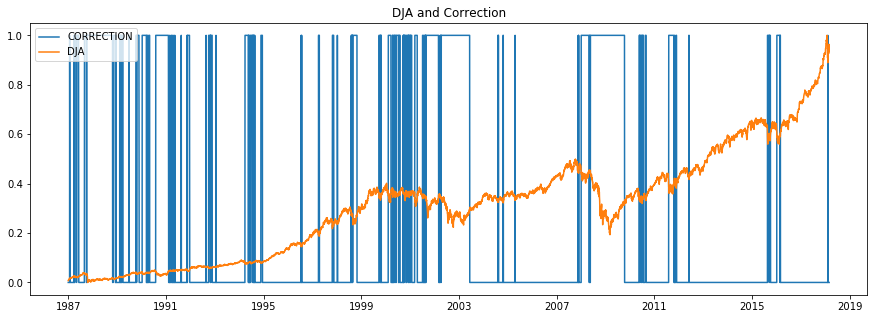

In [4]:
from datetime import timedelta

df_equity['DJA52HI'] = df_equity['DJA'].rolling(window=52*5, min_periods=1).max()
df_equity['DJA52HI_10PCT'] = df_equity['DJA52HI'] * 0.9
def is_correct(x):
    return 1 if ((x['DJA52HI'] - x['DJA']) > (x['DJA52HI'] * 0.10)) else 0
df_equity['CORRECTION'] = df_equity.apply(is_correct, axis=1)

# plot graph

plt.figure(figsize=(15,5))
plt.title('DJA and Correction')

for ticker in (['CORRECTION', 'DJA']):
    plt.plot(df_equity.index.values, df_equity[ticker], label=ticker)

plt.legend(loc='upper left')
plt.show()


### Here is a close up graph of the correction in 2016

Number of days in correction 35


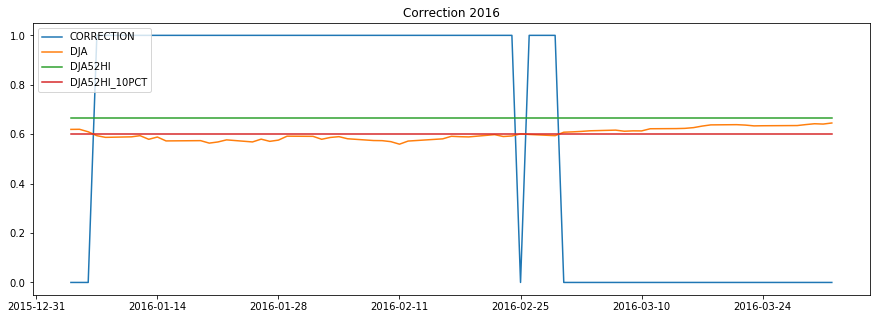

In [5]:

df_2016 = df_equity.loc['2016-01-01' : '2016-04-01']

# print("Number of days in correction", df_2016.loc[df_2016['CORRECTION']].shape[0])
print("Number of days in correction", df_2016.CORRECTION.sum())

# plot graph

plt.figure(figsize=(15,5))
plt.title('Correction 2016')

for ticker in (['CORRECTION', 'DJA', 'DJA52HI', 'DJA52HI_10PCT']):
    plt.plot(df_2016.index.values, df_2016[ticker], label=ticker)

plt.legend(loc='upper left')
plt.show()

### Here is a graph of the split between training set and testing set.

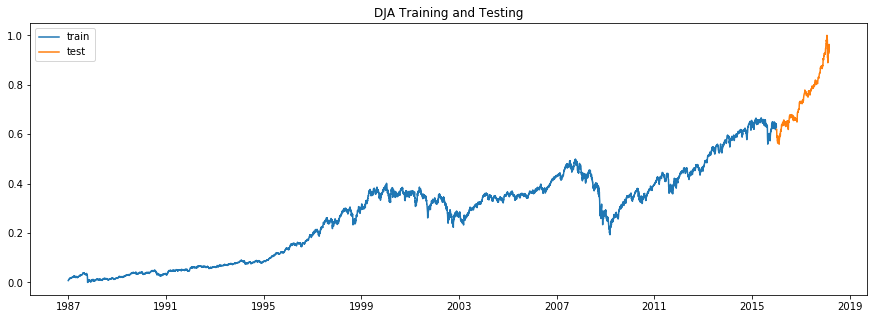

In [122]:
from datetime import timedelta

df_train = df_equity.loc[:'2015-12-31']
df_test = df_equity.loc['2016-01-01':]

# plot

plt.figure(figsize=(15,5))
plt.title('DJA Training and Testing')

plt.plot(df_train.index.values, df_train['DJA'], label='train')
plt.plot(df_test.index.values, df_test['DJA'], label='test')
plt.legend(loc='upper left')

plt.show()



### Here is a graph of the leading indicators overlaying the DJA

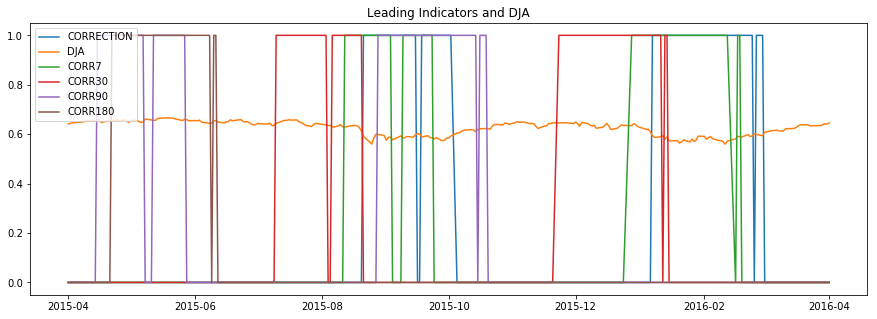

In [123]:

df_equity['CORR1'] = df_equity['CORRECTION'].shift(-1)
df_equity['CORR7'] = df_equity['CORRECTION'].shift(-7)
df_equity['CORR30'] = df_equity['CORRECTION'].shift(-30)
df_equity['CORR90'] = df_equity['CORRECTION'].shift(-90)
df_equity['CORR180'] = df_equity['CORRECTION'].shift(-180)

df_corr = df_equity.loc['2015-04-01' : '2016-04-01']

# plot graph

plt.figure(figsize=(15,5))
plt.title('Leading Indicators and DJA')

for ticker in (['CORRECTION', 'DJA', 'CORR7', 'CORR30', 'CORR90', 'CORR180']):
    plt.plot(df_corr.index.values, df_corr[ticker], label=ticker)

plt.legend(loc='upper left')
plt.show()



### Main dataset df summary

In [124]:

df = pd.concat([df_equity, df_treas, df_econ], axis=1)
df.fillna(method='bfill', inplace=True)
df.fillna(method='ffill', inplace=True)

df_train = df.loc[:'2015-12-31']
df_test = df.loc['2016-01-01':]



print(df.head(5))
# print(df.describe())
# print(df.sum())
# print(df_train.describe())
# print(df_train.CORRECTION.sum())
# print(df_test.describe())
# print(df_test.CORRECTION.sum())


                 DJA        SP    Nasdaq       VIX   DJA52HI  DJA52HI_10PCT  \
Date                                                                          
1987-01-01  0.007580  0.008505  0.008498  0.112939  0.007580       0.006822   
1987-01-02  0.007580  0.008505  0.008498  0.112939  0.007580       0.006822   
1987-01-05  0.009349  0.010672  0.009606  0.112939  0.009349       0.008414   
1987-01-06  0.009490  0.010895  0.010272  0.112939  0.009490       0.008541   
1987-01-07  0.010258  0.011858  0.011159  0.112939  0.010258       0.009233   

            CORRECTION  CORR1  CORR7  CORR30      ...           3 Yr  \
Date                                              ...                  
1987-01-01         0.0    0.0    0.0     0.0      ...       0.862967   
1987-01-02         0.0    0.0    0.0     0.0      ...       0.862967   
1987-01-05         0.0    0.0    0.0     0.0      ...       0.862967   
1987-01-06         0.0    0.0    0.0     0.0      ...       0.862967   
1987-01-07    

# Model Architecture



In [267]:
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential

from keras.layers import Conv1D

in_list=df_train.columns.difference(['CORRECTION', 'CORR1', 'CORR7', 'CORR30', 'CORR90', 'CORR180'])
in_dim=len(in_list)

out_list_all=['CORR1', 'CORR7', 'CORR30', 'CORR90', 'CORR180']

out_list=['CORR1']
out_dim=len(out_list)


# baseline models

baseline_model = Sequential()
baseline_model.add(Dense(64, input_dim=in_dim, activation='relu'))
baseline_model.add(Dense(8, activation='relu'))
baseline_model.add(Dense(len(out_list_all), activation='sigmoid'))

baseline_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

generalist_model = Sequential()
generalist_model.add(Dense(64, input_dim=in_dim, activation='relu'))
generalist_model.add(Dense(8, activation='relu'))
generalist_model.add(Dense(len(out_list_all), activation='sigmoid'))

generalist_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

specialist_model = [None] * len(out_list_all)
for c in range(0, len(out_list)):
    specialist_model[c] = Sequential()
    specialist_model[c].add(Dense(64, input_dim=in_dim, activation='relu'))    
    specialist_model[c].add(Dense(8, activation='relu'))
    specialist_model[c].add(Dense(1, activation='sigmoid'))    
    specialist_model[c].compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])    

# optimized

optimized_model = [None] * len(out_list_all)

for c in range(0, len(out_list_all)):
    optimized_model[c] = Sequential()
    optimized_model[c].add(Dense(64, input_dim=in_dim, activation='relu'))
    optimized_model[c].add(Dense(8, activation='relu'))
    # optimized_model[c].add(Dropout(0.1))
    optimized_model[c].add(Dense(8, activation='relu'))
    # optimized_model[c].add(Dropout(0.1))
    optimized_model[c].add(Dense(8, activation='relu'))
    # optimized_model[c].add(Dropout(0.1))
    optimized_model[c].add(Dense(8, activation='relu'))
    optimized_model[c].add(Dense(1, activation='sigmoid'))   
    optimized_model[c].compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    


# Preparing Training data


In [234]:

X = np.array(df_train[in_list])
Y = np.array(df_train[out_list])
Y_all = np.array(df_train[out_list_all])

X = np.delete(X, (0), axis=0)
Y = np.delete(Y, (0), axis=0)
Y_all = np.delete(Y_all, (0), axis=0)



### Baseline vs Generalist vs Specialist

In [274]:
vb=0

# Do not fit baseline_model

# generalist model
print("Generalist")
generalist_model.fit(X, Y_all, verbose=vb)

# specialist model
print("Specialist")
specialist_model[0].fit(X, Y, verbose=vb)

print("Optimized")
optimized_model[0].fit(X, Y, epochs=60, batch_size=8, verbose=vb)



Generalist
Specialist
Optimized


### Testing the model

 32/550 [>.............................] - ETA: 0s

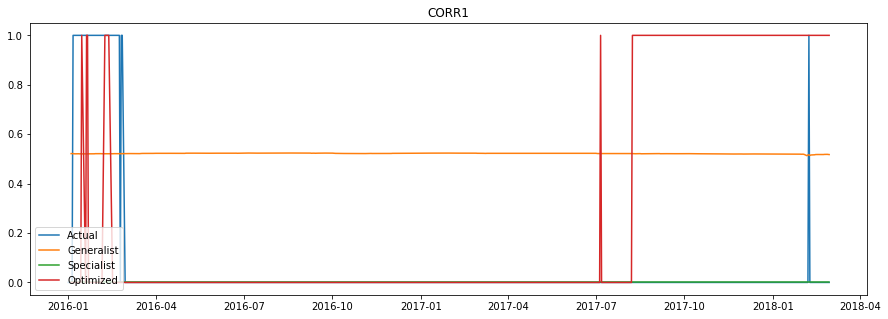

In [273]:
from scipy import stats

df_test_label = df_test.drop(df_test.index[[0]])

Test_X = np.array(df_test[in_list])
Test_Y = np.array(df_test[out_list])
Test_Y_all = np.array(df_test[out_list_all])

Test_X = np.delete(Test_X, (0), axis=0)
Test_Y = np.delete(Test_Y, (0), axis=0)
Test_Y_all = np.delete(Test_Y_all, (0), axis=0)

baseline_pred = baseline_model.predict(Test_X)
generalist_pred = generalist_model.predict(Test_X)
specialist_pred = specialist_model[0].predict_classes(Test_X)
optimized_pred = optimized_model[0].predict_classes(Test_X)

plt.figure(figsize=(15,5))

col = 0
plt.title(out_list[0])
for ticker in out_list:
    plt.plot(df_test.index.values, df_test[ticker], label='Actual')
    # plt.plot(df_test_label.index.values, baseline_pred[:,col], label='Baseline')
    plt.plot(df_test_label.index.values, generalist_pred[:,col], label='Generalist')
    plt.plot(df_test_label.index.values, specialist_pred[:,col], label='Specialist')
    plt.plot(df_test_label.index.values, optimized_pred[:,col], label='Optimized')
    col = col + 1
    
plt.legend(loc='lower left')
plt.show()
#


### Test Accuracy

In [269]:
# report test accuracy

scores = baseline_model.evaluate(X, Y_all, verbose=0)
print('Baseline Model accuracy: %.4f%%' % (scores[1] * 100))

scores = generalist_model.evaluate(X, Y_all, verbose=0)
print('Generalist Model accuracy: %.4f%%' % (scores[1] * 100))

scores = specialist_model[0].evaluate(X, Y, verbose=0)
print('Specialist Model accuracy: %.4f%%' % (scores[1] * 100))

scores = optimized_model[0].evaluate(X, Y, verbose=0)
print('Optimized Model accuracy: %.4f%%' % (scores[1] * 100))



Baseline Model accuracy: 48.4866%
Generalist Model accuracy: 48.7821%
Specialist Model accuracy: 60.1450%
Optimized Model accuracy: 91.6342%
